# Redes Neuronais + Backpropagation - Dígitos Manuscritos

## 1. Introdução

O sistema visual humano é algo fantástico. Apesar de super complexo, nos faz pensar que por exemplo, o reconhecimento de dígitos manuscritos é uma tarefa bem simples.

Quando vamos pensar em desenvolver um programa para fazer o reconhecimento de dígitos manuscritos percebemos o quão complexa a tarefa é. Intuições simples de como reconhecemos formas dos dígitos, como por exemplo o 8 possui duas circunfências e possui uma boa simetria, são questões dificeis de expressar através de algoritmos.

As redes neurais lidam muito bem com esse tipo de problema. A rede utiliza-se de exemplos para inferir regras para reconhecer os dígitos manuscritos.

Neste trabalho é desenvolvida uma rede neural com uma camada de entrada, uma camada oculta e uma camada de saída a fim de explorar conceitos de redes neurais e realizar experimentos para entender como esses conceitos funcionam na prática. É utilizado parte do conjuto de dados MNIST que possui uma série de dígitos manuscritos rotulados que serão utilizados para treinar e validar a rede neural.

## 2. Especificação

Neste trabalho deverá ser implementada uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Deve-se utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

<img src="cross-enthropy.jpg">

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, deve ser comparado os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, deve-se variar a taxa de aprendizado: 0.5, 1, 10.

Deve-se apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Deve-se apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado).

## 3. Implementação

Para implementação da rede neural é utilizada a API de redes neurais Keras. Keras é uma API de rede neural de alto nível, focada em facilidade de uso, prototipagem rápida, modularidade e extensibilidade. Ele trabalha com estruturas de aprendizado profundo, como o Tensorflow, Theano e CNTK.

Também são utilizadas as bibliotecas Matplotlib, Sklearn e Numpy. A primeira é utilizada para plotar exemplos de dígitos manuscritos e gráficos de treinamento do modelo, a segunda para dividir o conjunto de dados em subconjuntos de treino e teste e a terceira para carregar o conjunto de dados e realizar operações com os vetores de dados para utilizar na rede neural.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

c:\users\crist\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Para carregar o conjunto de dados é utilizada a função "loadtxt" da biblioteca numpy.

In [2]:
#load datset
data = numpy.loadtxt("data_tp1", delimiter=",")

Na primeira coluna do arquivo tem-se os rórulos corretos para cada dígito. Aqui é separado o rótulo na variável "target". Essa variável será útil para criar os subconjunto de treino e teste.

In [3]:
#target
target = data[:,0]
print(target)

[7. 2. 1. ... 2. 4. 0.]


As demais colunas são os pixels dos dígitos manuscritos. Assim como foi feito com o os rótulos, foram inseridos os dados na váriavel "data" para criar os subconjunto de treino e teste.

In [4]:
#data
data = data[:,1:] 
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Nesta etapa os dados são divididos em subconjuntos aleatórios de treino e teste utilizando a função "train_test_split" da biblioteca sklearn.

In [5]:
#random split train and test dataset
(trainX, testX, trainY, testY) = train_test_split(data, target, test_size=0.15)

Inspecionando os dados, pode-se observar que o conjunto de dados MNIST contém apenas imagens em escala de cinza.

<IPython.core.display.Javascript object>


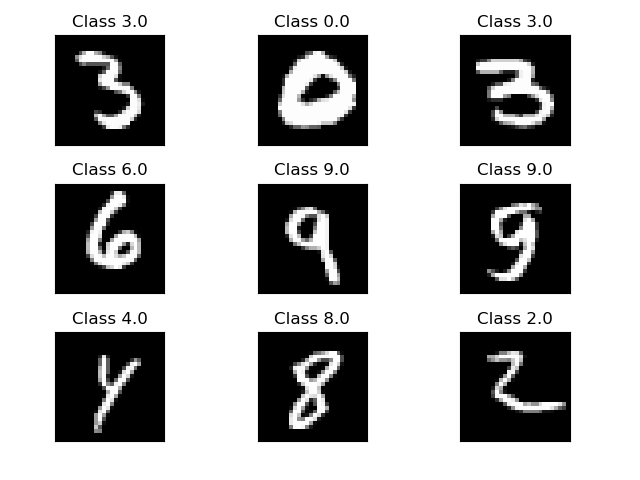

In [6]:
fig = plt.figure()
for i in range(9):
  image = trainX[i].reshape(28,28)  
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(image, cmap='gray', interpolation='none')
  plt.title("Class {}".format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

Os valores de pixel variam de 0 a 255: a maioria do plano de fundo é próxima de 0 e os próximos a 255 representam o dígito. Pode-se normalizar os dados de entrada para ajudar a acelerar o treinamento. Além disso, normalizar os dados vai reduzir a chance de ficar preso em ótimos locais quando utiliza-se a descida de gradiente para encontrar os pesos ideais para a rede.

Desta forma as entradas com os valores de pixel são reformuladas para ficar entre 0 e 1.

In [6]:
# normalize inputs from 0-255 to 0-1
trainX = trainX / 255
testX = testX / 255

Os rótulos são inteiros de 0 a 9. Esse é um problema de classificação de várias classes. Como tal, é uma boa prática usar "one hot encode output" dos valores de classe, transformando-os em vetor de inteiros de classe em uma matriz binária.

Pode-se fazer isso usando a função auxiliar interna "to_categorical" do Keras.

In [7]:
#one hot encode outputs
num_pixels = trainX.shape[1]
trainY = np_utils.to_categorical(trainY)
testY = np_utils.to_categorical(testY)
num_classes = trainY.shape[1]

Nesta etapa é construida a rede neural. 

O vetor de pixels será a entrada, desta forma tem-se 784 unidade na camada de entrada (váriavel num_pixels). Em seguida, tem-se uma camada oculta com n unidades, como experimento serão testadas variações de 25, 50 e 100 unidades na camada oculta. Para a classificação de várias classes, é adicionada outra camada  totalmente conectada para as 10 classes de saída diferentes. Para esta arquitetura de rede, pode-se usar o Modelo Sequencial Keras. As camadas são empilhadas usando o método "add". 

Ao adicionar a primeira camada no Modelo Sequencial, é necessário especificar a forma de entrada para que Keras possa criar as matrizes apropriadas. Para todas as camadas restantes, a forma é inferida automaticamente.

A fim de introduzir não linearidades na rede e elevá-la além das capacidades de um simples perceptron, são adicionadas funções de ativação à camada oculta, é utilizado a função sigmoid a fim de obter a não linearidade. A diferenciação para o treinamento via backpropagation acontece nos bastidores sem a necessidade de implementar os detalhes.

A última camada consiste de conexões para as 10 classes e a ativação é feita também utilizando a função sigmoid, conforme expecificação do trabalho.

Por fim, é configurado o processo de aprendizado através do método "compile". É especificada a função de perda. Para a específicação é solicitada a utilização da função "Cross Entropy". O Keras possui esta função já implementada, desta forma é passado para o parametro loss o nome desta função: "categorical_crossentropy".

Quanto ao otimizador, é utilizado o SGD implementado no Keras, será passada apenas a taxa de aprendizado, as demais configurações são padrão.

In [8]:
# define baseline model
def baseline_model(hidden_neurons, hidden_activation, out_activation, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(hidden_neurons, input_dim = num_pixels, kernel_initializer = 'normal', activation = hidden_activation))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation = out_activation))
    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

Após a definição dos parâmetros do modelo, pode-se ciar o processo de treinamento. É especificado quantas vezes será iterado o conjunto de treinamento (epochs) e quantas amostras serão utilizadas para uma atualização dos pesos do modelo (batch_size).

In [9]:
# define build the model
def build_model(hidden_neurons, lr, batch):
    epochs = 10
    hidden_activation = 'sigmoid'
    out_activation = 'sigmoid'

    #optimizer
    optimizer = SGD(lr=lr)

    #Gradient Descent
    model = baseline_model(hidden_neurons, hidden_activation, out_activation, optimizer)
    # Fit the model
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch, verbose=0)
    # Final evaluation of the model
    scores = model.evaluate(testX, testY, verbose=0)
    return history, (100-scores[1]*100)

A função plot_metrics será utilizada para entender o processo de treinamento. São representadas graficamente a curva de aprendizado do modelo, analisando a perda e a precisão.

In [10]:
# plotting the metrics
def plot_metrics():
    
    print("Error GD   : %.2f%%" % score_gd)
    print("Error SGD  : %.2f%%" % score_sgd)
    print("Error MB 10: %.2f%%" % score_mb_10)
    print("Error MB 50: %.2f%%" % score_mb_50)
    
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history_gd.history['acc'])
    plt.plot(history_gd.history['val_acc'])                
    plt.plot(history_sgd.history['acc'])
    plt.plot(history_sgd.history['val_acc']) 
    plt.plot(history_mb_10.history['acc'])
    plt.plot(history_mb_10.history['val_acc'])
    plt.plot(history_mb_50.history['acc'])
    plt.plot(history_mb_50.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['GD Train',
                'GD Test',
                'SGD Train',
                'SGD Test',
                'Mini Batch Train (10)', 
                'Mini Batch Test (10)',
                'Mini Batch Train (50)',
                'Mini Batch Test (50)'],
               loc='lower right', prop={'size': 6})

    plt.subplot(2,1,2)
    plt.plot(history_gd.history['loss'])
    plt.plot(history_gd.history['val_loss'])                
    plt.plot(history_sgd.history['loss'])
    plt.plot(history_sgd.history['val_loss']) 
    plt.plot(history_mb_10.history['loss'])
    plt.plot(history_mb_10.history['val_loss'])
    plt.plot(history_mb_50.history['loss'])
    plt.plot(history_mb_50.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['GD Train',
                'GD Test',
                'SGD Train',
                'SGD Test',
                'Mini Batch Train (10)', 
                'Mini Batch Test (10)',
                'Mini Batch Train (50)',
                'Mini Batch Test (50)'],
               loc='upper right', prop={'size': 6})

    fig.show()

## 4. Experimentos

Os experimentos estão divididos em três grandes blocos. O que difere cada bloco é a taxa de aprendizado, para o primeiro é trabalhada uma taxa de 0.5, para o segundo de 1 e o terceiro de 10.

Dentro de cada bloco são variados os algoritmos de cálculo de gradiente: 

1. Gradient Descent: o gradiente é calculado após cada época, desta forma é passado o parametro batch igual a 4500.

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada, desta forma é passado o parametro batch igual a 1.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas, desta forma é passado o parametro batch igual a 10 e 50.

A quantidade de unidade na camada oculta também é variada em 25, 50 e 100.

### 4.1. Experiemento 1

Para o primeiro experimento é utilizada a taxa de aprendizado de 0.5. O experimento foi dividido em três blocos onde no primeiro tem-se 25 unidades na camada oculta, no seguindo tem-se 50 unidades e no ultimo tem-se 100 unidades.


Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 25 unidades na camada oculta. 

Error GD   : 87.07%
Error SGD  : 14.40%
Error MB 10: 6.93%
Error MB 50: 8.67%


<IPython.core.display.Javascript object>


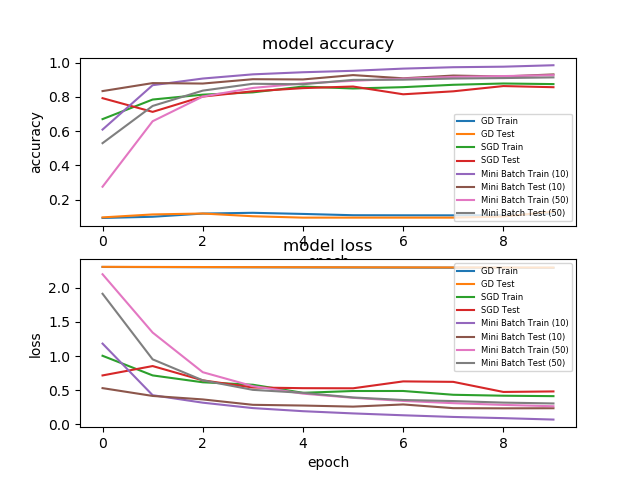

In [26]:
#Gradient Descent
history_gd, score_gd = build_model(25,0.5, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(25,0.5, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(25,0.5, 10)
history_mb_50, score_mb_50 = build_model(25,0.5, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 50 unidades na camada oculta. 

Error GD   : 89.73%
Error SGD  : 16.27%
Error MB 10: 6.67%
Error MB 50: 7.87%


<IPython.core.display.Javascript object>


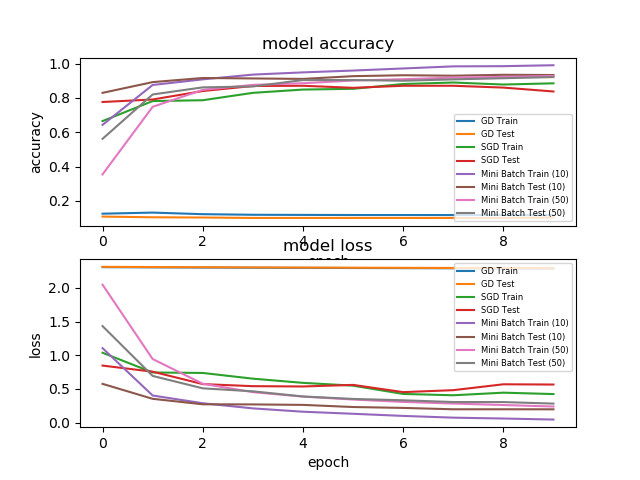

In [27]:
#Gradient Descent
history_gd, score_gd = build_model(50,0.5, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(50,0.5, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(50,0.5, 10)
history_mb_50, score_mb_50 = build_model(50,0.5, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 100 unidades na camada oculta. 

Error GD   : 84.00%
Error SGD  : 15.47%
Error MB 10: 5.60%
Error MB 50: 10.27%


<IPython.core.display.Javascript object>


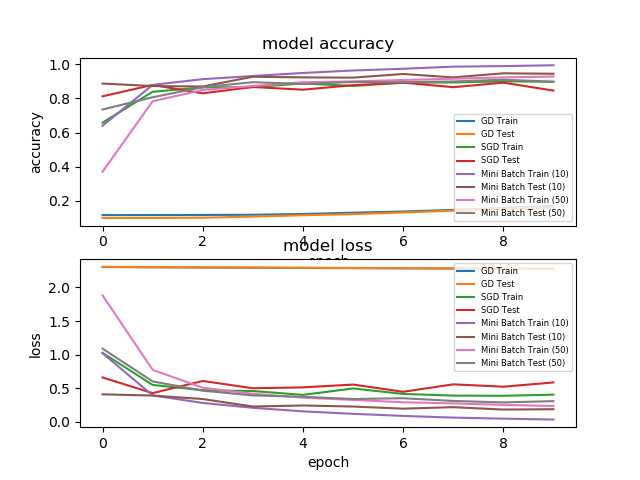

In [28]:
#Gradient Descent
history_gd, score_gd = build_model(100,0.5, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(100,0.5, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(100,0.5, 10)
history_mb_50, score_mb_50 = build_model(100,0.5, 50)

# plotting the metrics
plot_metrics()

#### Evidências

Pode-se observar no primeiro experimento que quando utiliza-se Gradiente Descent (GD) a descida de gradiente acaba sendo muito lenta. Isso ocorre devido a necessidade de calcular o gradiente para todo o conjunto de dados de treino para executar uma atualização. É possível verificar no gráfico abaixo que a perda no conjunto de treinamento começa a cair próximo à 50ª época.

Quando é utilizado Stochastic Gradient Descent (SGD) pode-se observar que a perda no conjunto de treinamento está diminuindo rapidamente nas duas primeiras épocas, demonstrando que a rede está aprendendo rapidamente. Porém pode-se observar que a utilização de mini-batchs tem uma performance superior ao SGD. Isto pode ser explicado devido a flutuação do SGD já que, mesmo achando potenciais mínimos locais, o algoritimo continua iterando, isso acaba complicando a convergencia para o mínimo exato.

Pose-se observar que utilizando mini-batchs de 10 e 50 entradas, tem-se uma performance superior no primeiro. Podemos observar que a convergência do primeiro é mais rápida.

A medida que aumenta-se a quantidade de unidades na camada oculta, ocorre uma melhoria quando é utilizado mini-batch com 10 entradas, porém com o mini-batch com 50 entradas e com SGD ocorre perda de performance no aprendizado.



GD 300 epochs: 10.67%


<IPython.core.display.Javascript object>


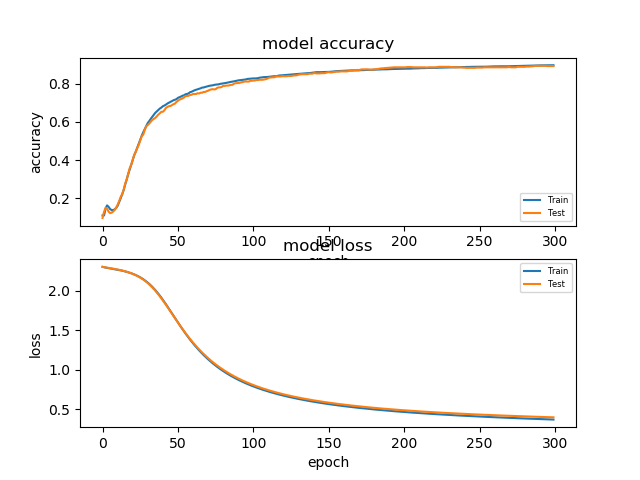

In [29]:
epochs = 300
hidden_activation = 'sigmoid'
out_activation = 'sigmoid'

#optimizer
optimizer = SGD(lr=0.5)

#Gradient Descent
model_gd_300 = baseline_model(100, hidden_activation, out_activation, optimizer)
# Fit the model
history_gd_300 = model_gd_300.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=4250, verbose=0)
# Final evaluation of the model
scores_gd_300 = model_gd_300.evaluate(testX, testY, verbose=0)
print("GD 300 epochs: %.2f%%" % (100-scores_gd_300[1]*100))

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_gd_300.history['acc'])
plt.plot(history_gd_300.history['val_acc'])                
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train',
            'Test'],
            loc='lower right', prop={'size': 6})

plt.subplot(2,1,2)
plt.plot(history_gd_300.history['loss'])
plt.plot(history_gd_300.history['val_loss'])                
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train',
            'Test'],
            loc='upper right', prop={'size': 6})

fig.show()

### 4.2. Experiemento 2

Para o segundo experimento é utilizada a taxa de aprendizado de 1. O experimento foi dividido em três blocos onde no primeiro tem-se 25 unidades na camada oculta, no seguindo tem-se 50 unidades e no ultimo tem-se 100 unidades.

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 25 unidades na camada oculta. 

Error GD   : 84.13%
Error SGD  : 25.33%
Error MB 10: 9.60%
Error MB 50: 10.13%


<IPython.core.display.Javascript object>


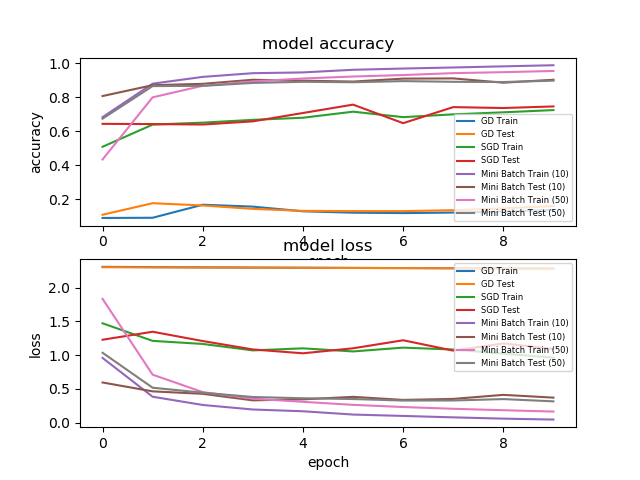

In [51]:
#Gradient Descent
history_gd, score_gd = build_model(25,1, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(25,1, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(25,1, 10)
history_mb_50, score_mb_50 = build_model(25,1, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 50 unidades na camada oculta. 

Error GD   : 69.07%
Error SGD  : 45.07%
Error MB 10: 7.60%
Error MB 50: 10.27%


<IPython.core.display.Javascript object>


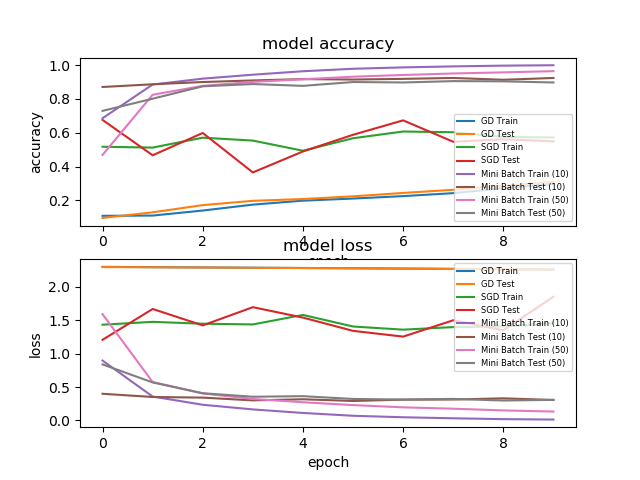

In [52]:
#Gradient Descent
history_gd, score_gd = build_model(50,1, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(50,1, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(50,1, 10)
history_mb_50, score_mb_50 = build_model(50,1, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 100 unidades na camada oculta. 

Error GD   : 58.00%
Error SGD  : 55.33%
Error MB 10: 7.20%
Error MB 50: 9.33%


<IPython.core.display.Javascript object>


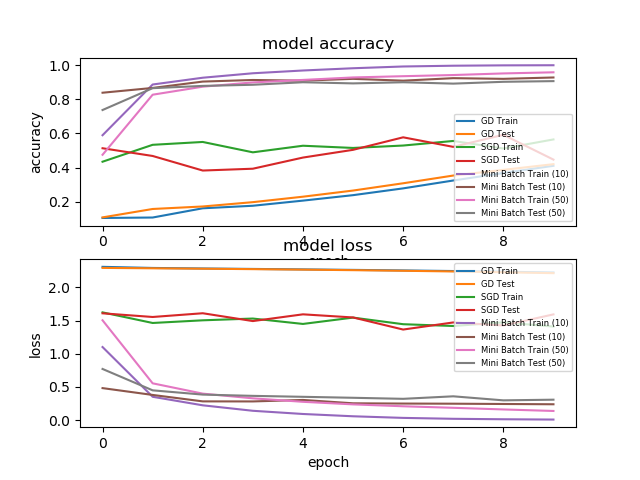

In [53]:
#Gradient Descent
history_gd, score_gd = build_model(100,1, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(100,1, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(100,1, 10)
history_mb_50, score_mb_50 = build_model(100,1, 50)

# plotting the metrics
plot_metrics()

#### Evidências

Pode-se observar no segundo experimento que ao aumentar a taxa de aprendizado há uma melhoria na convergência utilizando-se GD. Apesar de estar calculando o gradiente para todo o conjunto de treino e depois atualizando os pesos, há uma convergência mais rápida que no experiemnto 1, devido a uma atualização de magnitude maior nos pesos.

Para SGD, observa-se uma oscilação muito grande. Como o gradiente esta sendo calculado para cada entrada e tem-se uma taxa de aprendizado maior, com o uso deste algoritmo está ocorrendo um comportamento divergente indesejável em sua função de perda.

Quando utiliza-se Mini-batch, observa-se uma rápida convergência e pouca oscilação, tendo valores próximos aos alcançados no experimento 1. Também pode-se observar uma redução no erro a média que foram aumentadas as unidades na camada oculta.

### 4.3. Experiemento 3

Para o terceiro experimento é utilizada a taxa de aprendizado de 10. O experimento foi dividido em três blocos onde no primeiro tem-se 25 unidades na camada oculta, no seguindo tem-se 50 unidades e no ultimo tem-se 100 unidades.

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 25 unidades na camada oculta. 

Error GD   : 65.87%
Error SGD  : 82.00%
Error MB 10: 29.87%
Error MB 50: 11.33%


<IPython.core.display.Javascript object>


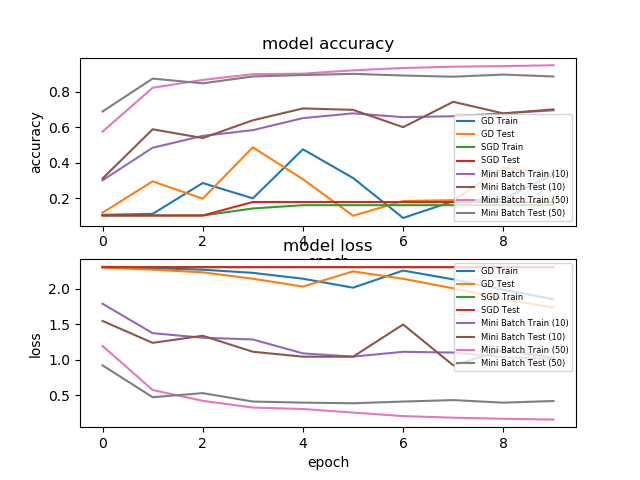

In [54]:
#Gradient Descent
history_gd, score_gd = build_model(25,10, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(25,10, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(25,10, 10)
history_mb_50, score_mb_50 = build_model(25,10, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 50 unidades na camada oculta. 

Error GD   : 78.40%
Error SGD  : 90.80%
Error MB 10: 88.40%
Error MB 50: 9.73%


<IPython.core.display.Javascript object>


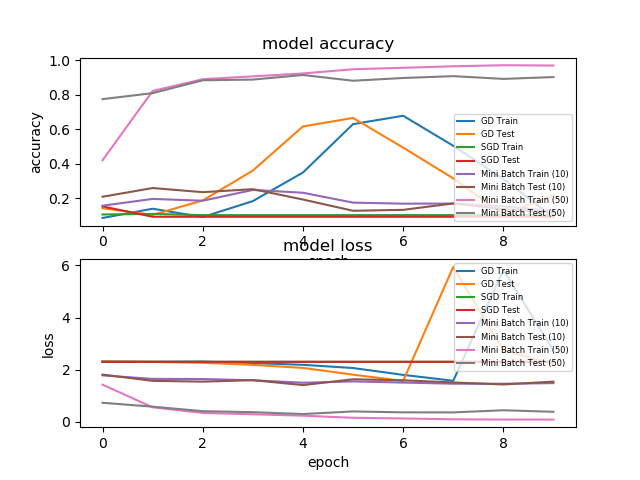

In [55]:
#Gradient Descent
history_gd, score_gd = build_model(50,10, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(50,10, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(50,10, 10)
history_mb_50, score_mb_50 = build_model(50,10, 50)

# plotting the metrics
plot_metrics()

Abaixo pode-se visualizar o percentual de erro para cada utilização do algoritmo de Gradiente e os gráficos de precisão e de perda quando utiliza-se 100 unidades na camada oculta. 

Error GD   : 86.53%
Error SGD  : 90.67%
Error MB 10: 62.00%
Error MB 50: 7.60%


<IPython.core.display.Javascript object>


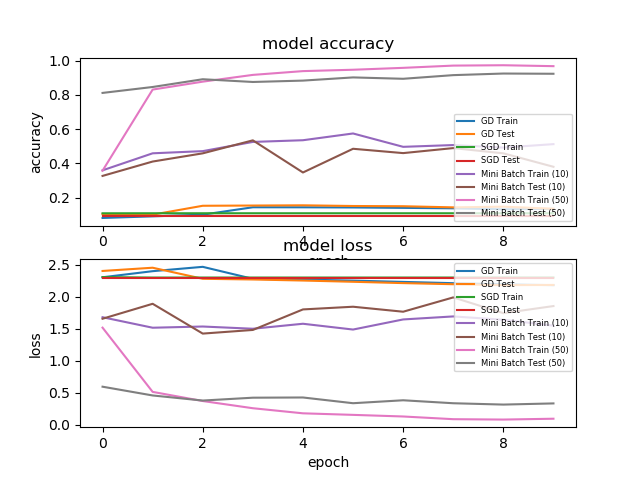

In [56]:
#Gradient Descent
history_gd, score_gd = build_model(100,10, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model(100,10, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model(100,10, 10)
history_mb_50, score_mb_50 = build_model(100,10, 50)

# plotting the metrics
plot_metrics()

#### Evidências

Com a definição taxa de aprendizado muito alta, para o caso do experimento 3, uma taxa de aprendizado igual a 10, esta ocorrendo um comportamento divergente indesejável na sua função de perda tanto para GD quanto para SGD e Mini-batch de 10 entradas devido à atualizações drásticas nos pesos. Porém pode-se observar uma boa convergencia para Mini-batchs de 50 entradas. A rede foi capaz de aprender de forma rápida e ter resultados próximos aos do experimento 1 e 2 para este mesmo algoritmo com mini-batchs de 50 entradas.

## 5. Extras

Nesta seção são apresentadas outras redes que lidam melhor com o reconhecimento de dígitos manuscritos.

### 5.1. Função de Ativação e Otimização 

In [47]:
# define build the model
def build_model_improved(hidden_neurons, batch):
    epochs = 10
    hidden_activation = 'relu'
    out_activation = 'softmax'

    #optimizer
    optimizer = 'Adam'

    #Gradient Descent
    model = baseline_model(hidden_neurons, hidden_activation, out_activation, optimizer)
    # Fit the model
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch, verbose=0)
    # Final evaluation of the model
    scores = model.evaluate(testX, testY, verbose=0)
    return history, (100-scores[1]*100)

Error GD   : 31.33%
Error SGD  : 9.33%
Error MB 10: 8.40%
Error MB 50: 10.00%


<IPython.core.display.Javascript object>


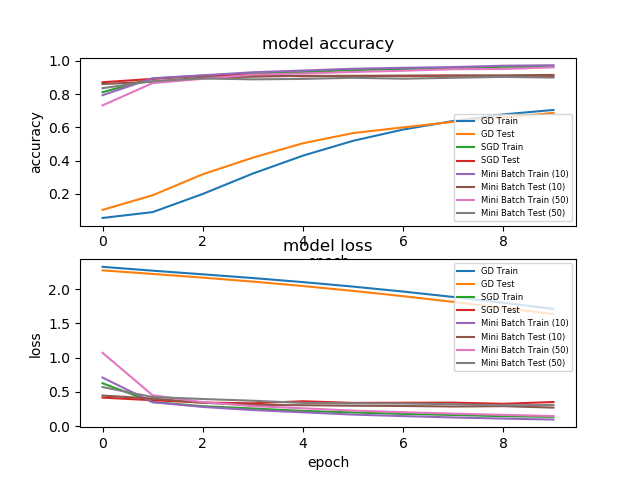

In [43]:
#Gradient Descent
history_gd, score_gd = build_model_improved(100, 4250)

#Stochastic Gradient Descent
history_sgd, score_sgd = build_model_improved(100, 1)

#Mini-Batch Gradient Descent
history_mb_10, score_mb_10 = build_model_improved(100, 10)
history_mb_50, score_mb_50 = build_model_improved(100, 50)

# plotting the metrics
plot_metrics()

### 5.2. Convolutional Neural Network (CNN)

In [48]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
model_cnn = larger_model()
X_train = trainX.reshape(trainX.shape[0], 1, 28, 28).astype('float32')
X_test = testX.reshape(testX.shape[0], 1, 28, 28).astype('float32')
# Fit the model
history_cnn = model_cnn.fit(X_train, trainY, validation_data=(X_test, testY), epochs=10, batch_size=15)
# Final evaluation of the model
scores_cnn = model_cnn.evaluate(X_test, testY, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores_cnn[1]*100))

Train on 4250 samples, validate on 750 samples
Epoch 1/10
4250/4250 [==============================] - 15s 4ms/step - loss: 0.8092 - acc: 0.7320 - val_loss: 0.3129 - val_acc: 0.9120
Epoch 2/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.2406 - acc: 0.9219 - val_loss: 0.1746 - val_acc: 0.9520
Epoch 3/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.1764 - acc: 0.9428 - val_loss: 0.1222 - val_acc: 0.9547
Epoch 4/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.1269 - acc: 0.9584 - val_loss: 0.1306 - val_acc: 0.9560
Epoch 5/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.1112 - acc: 0.9612 - val_loss: 0.1036 - val_acc: 0.9627
Epoch 6/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.0952 - acc: 0.9689 - val_loss: 0.1183 - val_acc: 0.9667
Epoch 7/10
4250/4250 [==============================] - 13s 3ms/step - loss: 0.0750 - acc: 0.9732 - val_loss: 0.1074 - val_acc: 0.9680
Epoch 8/

<IPython.core.display.Javascript object>


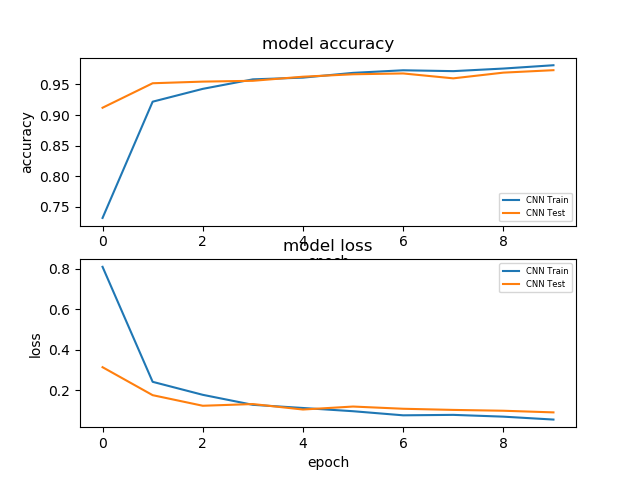

In [50]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])                
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN Train',
            'CNN Test'],
            loc='lower right', prop={'size': 6})

plt.subplot(2,1,2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])                
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN Train',
            'CNN Test'],
            loc='upper right', prop={'size': 6})

fig.show()

## 6. Conclusão

Através dos experimentos realizados pode-se verificar que escolher uma taxa de aprendizado adequada pode ser difícil. Uma taxa de aprendizado pequena leva a uma convergência lenta, enquanto uma taxa de aprendizado  que é muito grande  pode dificultar  a convergência e fazer com que a função de perda flutue em torno de um mínimo ou até mesmo divergir.

## Referências

https://arxiv.org/pdf/1506.01186.pdf